In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import koh
importlib.reload(koh)
from koh import SelfOrganizingMap as SOM

## MNIST dataset

In [36]:
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test) 

In [37]:
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = ''
training_images_filepath = join(input_path, 'dane_koh/mnist_data/train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'dane_koh/mnist_data/train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 'dane_koh/mnist_data/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 'dane_koh/mnist_data/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')


Train size: (60000, 784)
Test size: (10000, 784)


c:\Users\barte\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\barte\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\barte\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\barte\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038

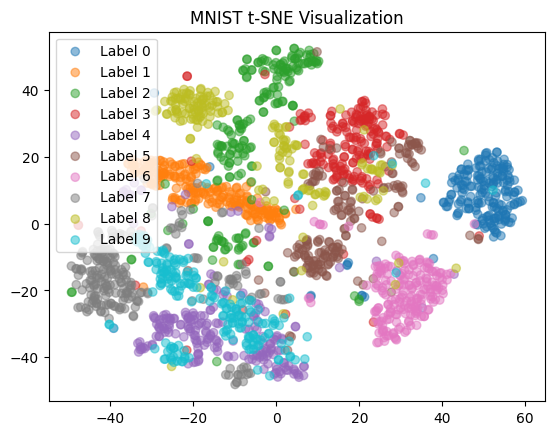

In [38]:
from sklearn.manifold import TSNE

mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

X_train = np.array(x_train)
X_test = np.array(x_test)
Y_train = np.array(y_train)
Y_test = np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

print(f"Train size: {X_train.shape}")
print(f"Test size: {X_test.shape}")

# Use t-SNE to reduce dimensions
model = TSNE(n_components=2, random_state=123)
tsne_data = model.fit_transform(X_train[:2000])  
tsne_data = np.vstack((tsne_data.T, Y_train[:2000].T)).T


colors = plt.cm.get_cmap('tab10', 10) 


for label in np.unique(Y_train[:2000]):
    filtered = tsne_data[tsne_data[:,2] == label]
    plt.scatter(filtered[:,0], filtered[:,1], c=np.array([colors(label)] * len(filtered)), alpha=0.5, label=f'Label {label}')

plt.title("MNIST t-SNE Visualization")
plt.legend()
plt.show()


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from sklearn.manifold import TSNE
from tqdm import tqdm

mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, 
                                  test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

# Prepare data
X_train = np.array(x_train).reshape(len(x_train), -1) 
y_train = np.array(y_train)
X_train = X_train / 255.0  # Normalize to [0,1]

sample_size = 10000
X_sample = X_train[:sample_size]
y_sample = y_train[:sample_size]

### Train SOM on MNIST Data

## Hexagonal topology

In [40]:
som = SOM(grid_shape=(5,5), 
                       input_dim=784, 
                       topology='hexagonal',
                       neighborhood_fn='gaussian')

print("Training SOM...")
som.train(X_sample, num_epochs=100, beta=1.0, lambda_=5)

Training SOM...
Epoch 1/100 completed.
Epoch 2/100 completed.
Epoch 3/100 completed.
Epoch 4/100 completed.
Epoch 5/100 completed.
Epoch 6/100 completed.
Epoch 7/100 completed.
Epoch 8/100 completed.
Epoch 9/100 completed.
Epoch 10/100 completed.
Epoch 11/100 completed.
Epoch 12/100 completed.
Epoch 13/100 completed.
Epoch 14/100 completed.
Epoch 15/100 completed.
Epoch 16/100 completed.
Epoch 17/100 completed.
Epoch 18/100 completed.
Epoch 19/100 completed.
Epoch 20/100 completed.
Epoch 21/100 completed.
Epoch 22/100 completed.
Epoch 23/100 completed.
Epoch 24/100 completed.
Epoch 25/100 completed.
Epoch 26/100 completed.
Epoch 27/100 completed.
Epoch 28/100 completed.
Epoch 29/100 completed.
Epoch 30/100 completed.
Epoch 31/100 completed.
Epoch 32/100 completed.
Epoch 33/100 completed.
Epoch 34/100 completed.
Epoch 35/100 completed.
Epoch 36/100 completed.
Epoch 37/100 completed.
Epoch 38/100 completed.
Epoch 39/100 completed.
Epoch 40/100 completed.
Epoch 41/100 completed.
Epoch 42/

### Visualize SOM Results

Hexagonal Grid with Dominant Labels:


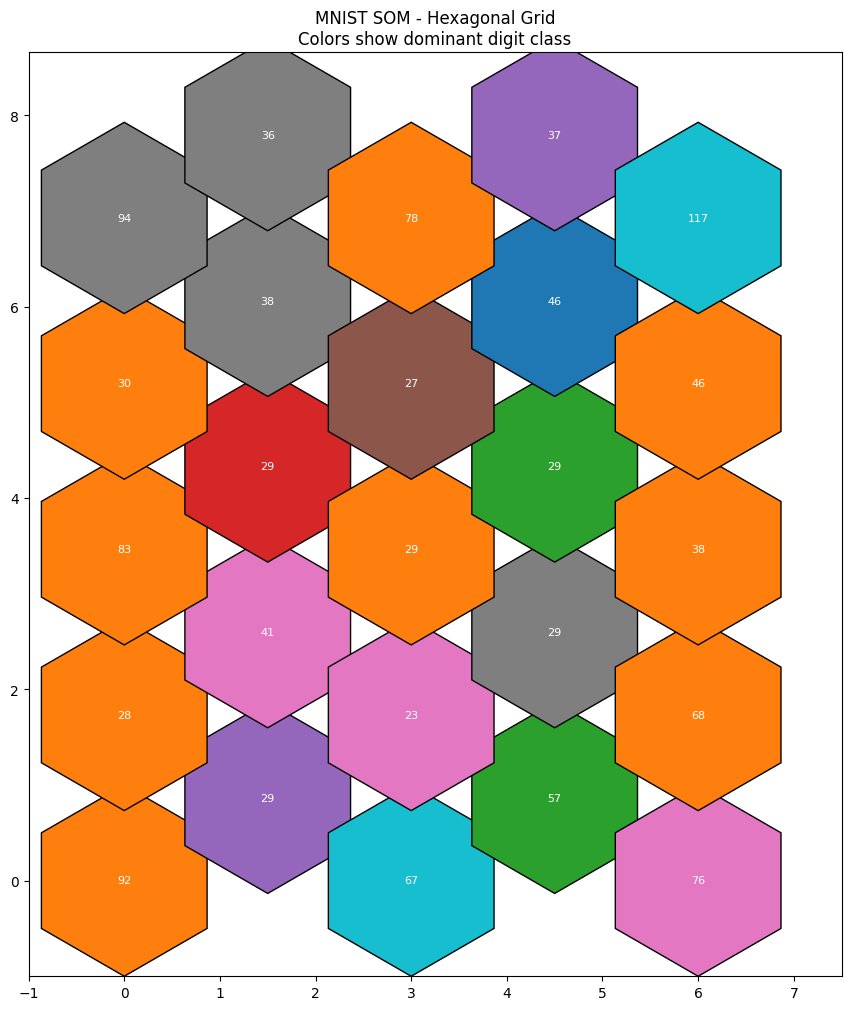

Showing 5 sample digits from each neuron:


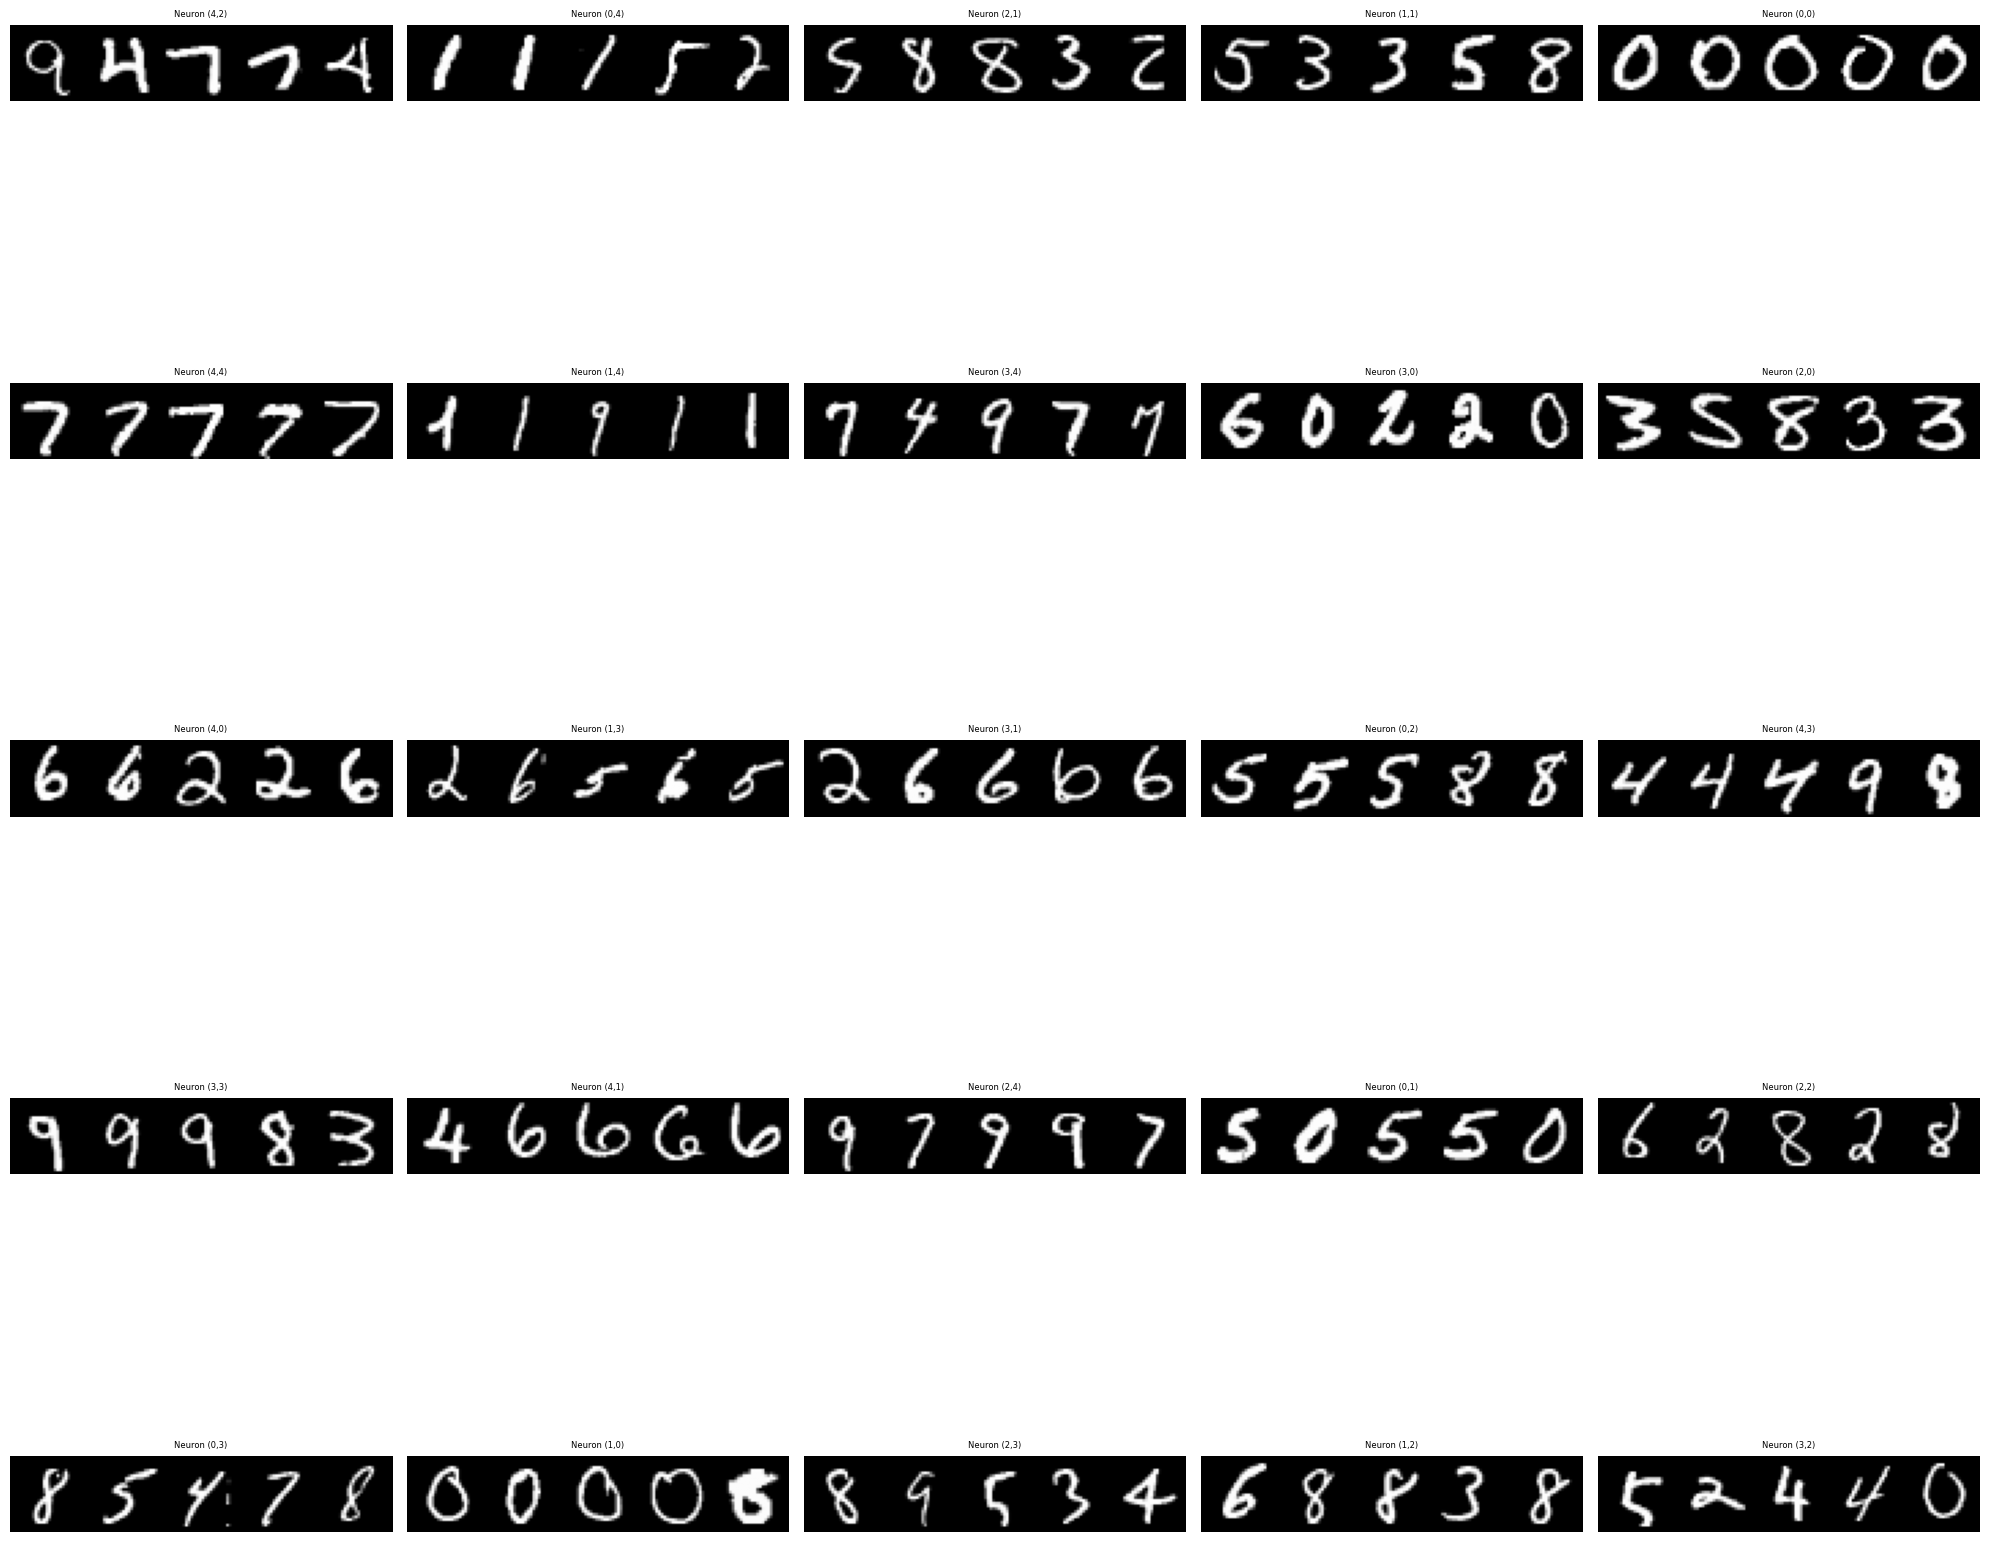

In [41]:
print("Hexagonal Grid with Dominant Labels:")

bmus = som.map_vects(X_sample)
label_map = np.zeros((*som.grid_shape, 10))  

for (i,j), label in zip(bmus, y_sample):
    label_map[i,j,label] += 1

dominant_labels = np.argmax(label_map, axis=2)
counts = np.max(label_map, axis=2)

# Plot
fig, ax = plt.subplots(figsize=(12,12))
ax.set_aspect('equal')

for i in range(som.grid_shape[0]):
    for j in range(som.grid_shape[1]):
        x = j * 1.5
        y = i * np.sqrt(3) + (j % 2) * np.sqrt(3)/2
        
        # Color by dominant label
        color = plt.cm.tab10(dominant_labels[i,j]/10)
        hexagon = RegularPolygon((x, y), numVertices=6, radius=1.0,
                               facecolor=color, edgecolor='black')
        ax.add_patch(hexagon)
        
        plt.text(x, y, f"{int(counts[i,j])}", ha='center', va='center', 
                fontsize=8, color='white' if counts[i,j] > 0 else 'gray')

plt.title("MNIST SOM - Hexagonal Grid\nColors show dominant digit class")
plt.xlim(-1, som.grid_shape[1]*1.5)
plt.ylim(-1, som.grid_shape[0]*np.sqrt(3))
plt.show()

print("Showing 5 sample digits from each neuron:")

neuron_samples = {}
for (i,j), (x,label) in zip(bmus, zip(X_sample, y_sample)):
    if (i,j) not in neuron_samples:
        neuron_samples[(i,j)] = []
    if len(neuron_samples[(i,j)]) < 5:  
        neuron_samples[(i,j)].append((x,label))

num_neurons = len(neuron_samples)
cols = 5  
rows = num_neurons

plt.figure(figsize=(20, 20))
for idx, ((i,j), samples) in enumerate(neuron_samples.items()):
    ax = plt.subplot(som.grid_shape[0], som.grid_shape[1], idx+1)
    
    composite = np.zeros((28*1, 28*5))  
    for s_idx, (x, _) in enumerate(samples):
        composite[:, s_idx*28:(s_idx+1)*28] = x.reshape(28,28)
    
    plt.imshow(composite, cmap='gray')
    plt.title(f"Neuron ({i},{j})", fontsize=6)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Rectangular topology

In [42]:
rect_som = SOM(grid_shape=(5,5), 
                           input_dim=784, 
                           topology='rectangular',
                           neighborhood_fn='gaussian')

print("Training rectangular SOM...")
rect_som.train(X_sample, num_epochs=100, beta=1.0, lambda_=5)

Training rectangular SOM...
Epoch 1/100 completed.
Epoch 2/100 completed.
Epoch 3/100 completed.
Epoch 4/100 completed.
Epoch 5/100 completed.
Epoch 6/100 completed.
Epoch 7/100 completed.
Epoch 8/100 completed.
Epoch 9/100 completed.
Epoch 10/100 completed.
Epoch 11/100 completed.
Epoch 12/100 completed.
Epoch 13/100 completed.
Epoch 14/100 completed.
Epoch 15/100 completed.
Epoch 16/100 completed.
Epoch 17/100 completed.
Epoch 18/100 completed.
Epoch 19/100 completed.
Epoch 20/100 completed.
Epoch 21/100 completed.
Epoch 22/100 completed.
Epoch 23/100 completed.
Epoch 24/100 completed.
Epoch 25/100 completed.
Epoch 26/100 completed.
Epoch 27/100 completed.
Epoch 28/100 completed.
Epoch 29/100 completed.
Epoch 30/100 completed.
Epoch 31/100 completed.
Epoch 32/100 completed.
Epoch 33/100 completed.
Epoch 34/100 completed.
Epoch 35/100 completed.
Epoch 36/100 completed.
Epoch 37/100 completed.
Epoch 38/100 completed.
Epoch 39/100 completed.
Epoch 40/100 completed.
Epoch 41/100 complete

## Visualize SOM

Rectangular Grid with Dominant Labels:


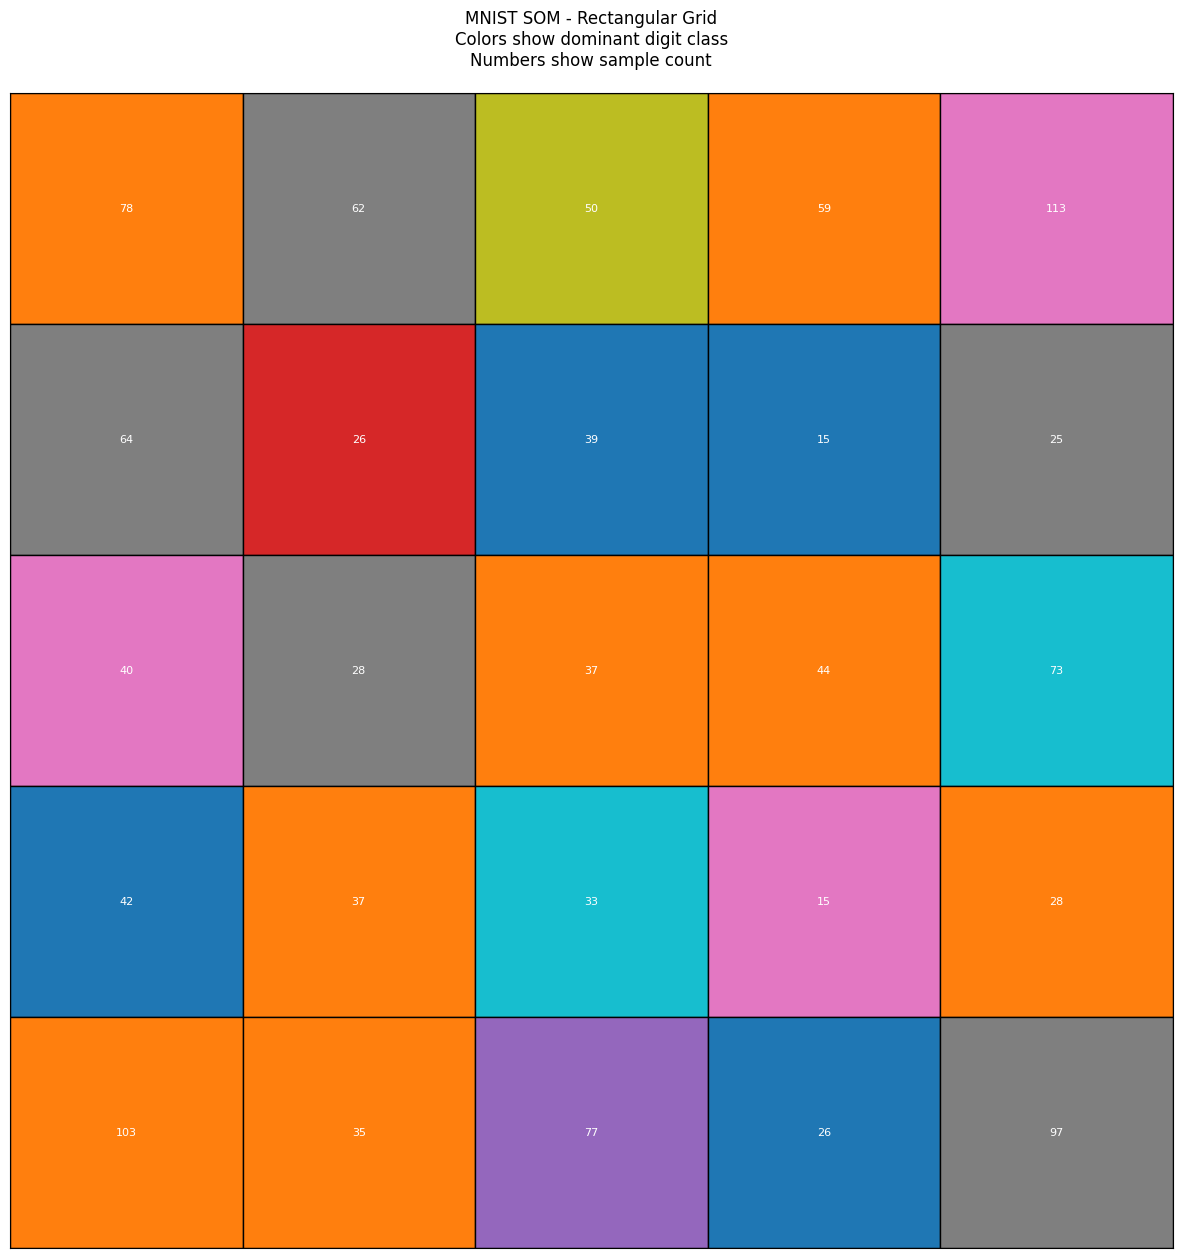

Showing 5 sample digits from each rectangular SOM neuron:


C:\Users\barte\AppData\Local\Temp\ipykernel_18520\1368118721.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


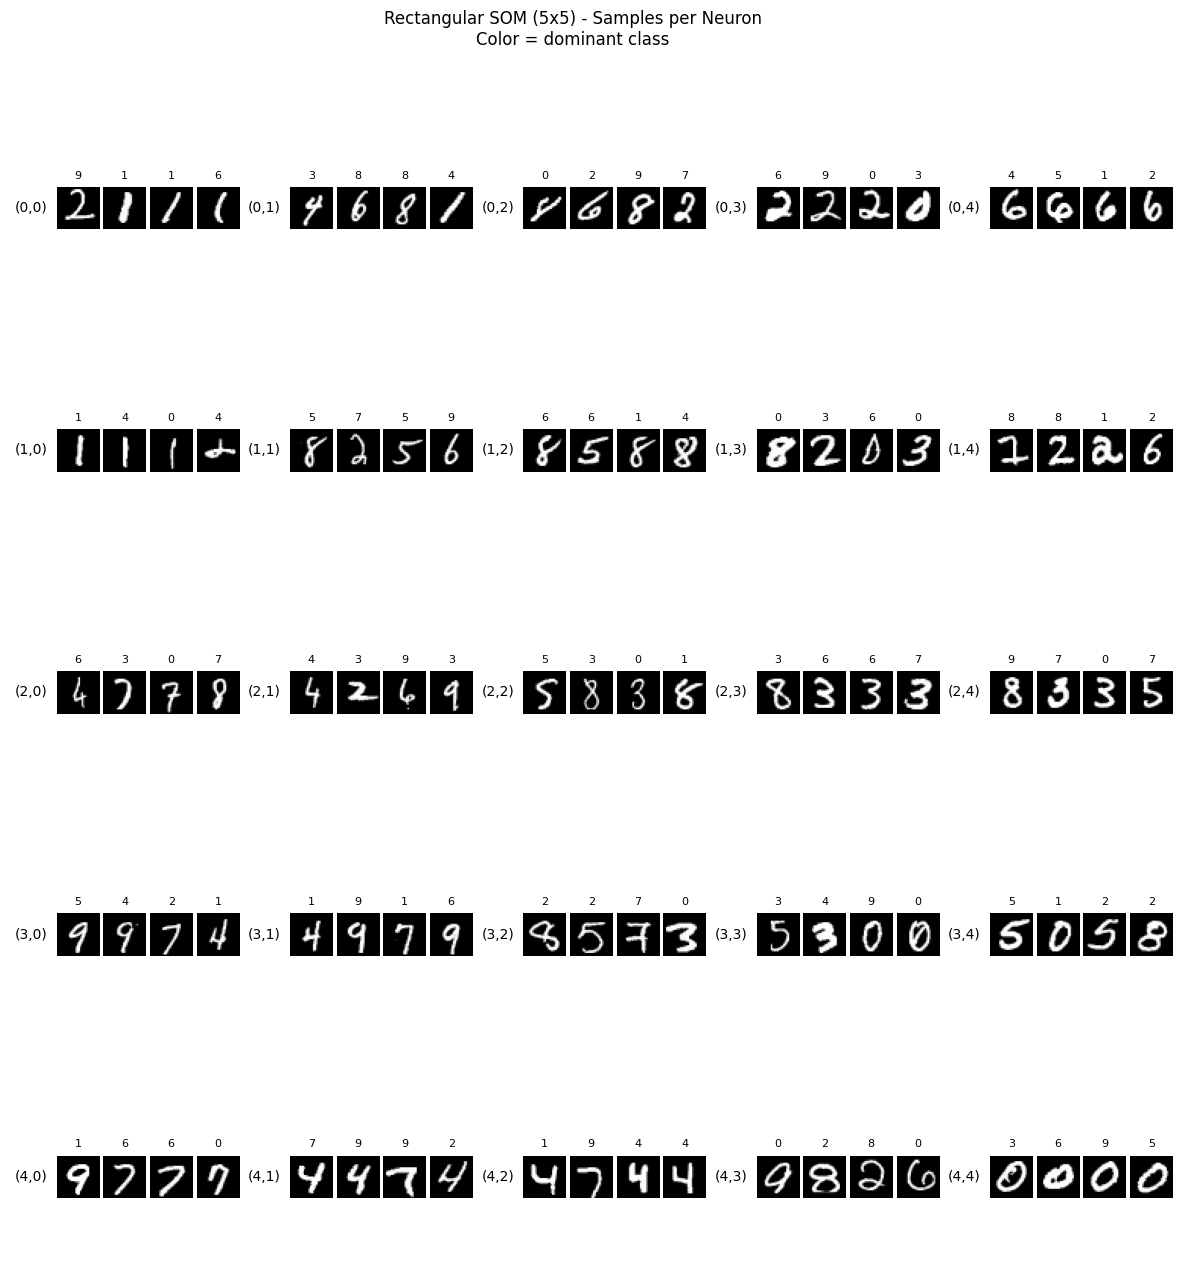

In [43]:
from matplotlib.patches import Rectangle


print("Rectangular Grid with Dominant Labels:")

rect_bmus = rect_som.map_vects(X_sample)
rect_label_map = np.zeros((*rect_som.grid_shape, 10))  

for (i,j), label in zip(rect_bmus, y_sample):
    rect_label_map[i,j,label] += 1

rect_dominant = np.argmax(rect_label_map, axis=2)
rect_counts = np.max(rect_label_map, axis=2)

plt.figure(figsize=(15,15))
for i in range(rect_som.grid_shape[0]):
    for j in range(rect_som.grid_shape[1]):
        color = plt.cm.tab10(rect_dominant[i,j]/10)
        
        rect = Rectangle((j-0.5, i-0.5), width=1, height=1,
                        facecolor=color, edgecolor='black')
        plt.gca().add_patch(rect)
        
        plt.text(j, i, f"{int(rect_counts[i,j])}", 
                ha='center', va='center',
                fontsize=8, 
                color='white' if rect_counts[i,j] > 0 else 'gray')

plt.title("MNIST SOM - Rectangular Grid\nColors show dominant digit class\nNumbers show sample count", pad=20)
plt.xlim(-0.5, rect_som.grid_shape[1]-0.5)
plt.ylim(-0.5, rect_som.grid_shape[0]-0.5)
plt.gca().invert_yaxis() 
plt.xticks([])
plt.yticks([])
plt.grid(True, which='both', color='gray', linestyle='-', linewidth=0.5)
plt.show()

print("Showing 5 sample digits from each rectangular SOM neuron:")

rect_neuron_samples = {}
for (i,j), (x,label) in zip(rect_bmus, zip(X_sample, y_sample)):
    if (i,j) not in rect_neuron_samples:
        rect_neuron_samples[(i,j)] = []
    if len(rect_neuron_samples[(i,j)]) < 5:
        rect_neuron_samples[(i,j)].append((x,label))


total_cols_needed = rect_som.grid_shape[1] * 5
rows = rect_som.grid_shape[0]
cols_per_neuron = 5

plt.figure(figsize=(min(30, rect_som.grid_shape[1]*3), rows*3))

grid = plt.GridSpec(rows, total_cols_needed, wspace=0.1, hspace=0.3)

for (i,j), samples in rect_neuron_samples.items():
    start_col = j * cols_per_neuron
    
    ax_label = plt.subplot(grid[i, start_col])
    ax_label.text(0.5, 0.5, f"({i},{j})", ha='center', va='center', fontsize=10)
    ax_label.set_facecolor(plt.cm.tab10(rect_dominant[i,j]/10))
    ax_label.axis('off')
    
    for s_idx, (x, label) in enumerate(samples[:4]):  
        ax = plt.subplot(grid[i, start_col + s_idx + 1])
        ax.imshow(x.reshape(28,28), cmap='gray')
        ax.set_title(label, fontsize=8)
        ax.axis('off')

for i in range(rows):
    for j in range(rect_som.grid_shape[1]):
        if (i,j) not in rect_neuron_samples:
            start_col = j * cols_per_neuron
            ax = plt.subplot(grid[i, start_col:start_col+cols_per_neuron])
            ax.set_facecolor('lightgray')
            ax.text(0.5, 0.5, "Empty", ha='center', va='center')
            ax.axis('off')

plt.suptitle(f"Rectangular SOM ({rows}x{rect_som.grid_shape[1]}) - Samples per Neuron\nColor = dominant class", y=0.95)
plt.tight_layout()
plt.show()

## Human Activity Dataset

In [44]:
X_train = np.loadtxt(r'dane_koh\UCI HAR Dataset\train\X_train.txt')
y_train = np.loadtxt(r'dane_koh\UCI HAR Dataset\train\y_train.txt')
activity_labels = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS', 
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

#### Training SOM on HAR Data

In [45]:
har_som = SOM(grid_shape=(5,5), 
                           input_dim=X_train.shape[1],
                           topology='rectangular',
                           neighborhood_fn='gaussian')

print("Training SOM on HAR data...")
har_som.train(X_train, num_epochs=50, beta=1.0, lambda_=5)

har_bmus = har_som.map_vects(X_train)
har_dominant = np.zeros(har_som.grid_shape, dtype=int)
har_counts = np.zeros(har_som.grid_shape)

for (i,j), label in zip(har_bmus, y_train):
    har_counts[i,j] += 1
    if label > har_dominant[i,j]:
        har_dominant[i,j] = label

Training SOM on HAR data...
Epoch 1/50 completed.
Epoch 2/50 completed.
Epoch 3/50 completed.
Epoch 4/50 completed.
Epoch 5/50 completed.
Epoch 6/50 completed.
Epoch 7/50 completed.
Epoch 8/50 completed.
Epoch 9/50 completed.
Epoch 10/50 completed.
Epoch 11/50 completed.
Epoch 12/50 completed.
Epoch 13/50 completed.
Epoch 14/50 completed.
Epoch 15/50 completed.
Epoch 16/50 completed.
Epoch 17/50 completed.
Epoch 18/50 completed.
Epoch 19/50 completed.
Epoch 20/50 completed.
Epoch 21/50 completed.
Epoch 22/50 completed.
Epoch 23/50 completed.
Epoch 24/50 completed.
Epoch 25/50 completed.
Epoch 26/50 completed.
Epoch 27/50 completed.
Epoch 28/50 completed.
Epoch 29/50 completed.
Epoch 30/50 completed.
Epoch 31/50 completed.
Epoch 32/50 completed.
Epoch 33/50 completed.
Epoch 34/50 completed.
Epoch 35/50 completed.
Epoch 36/50 completed.
Epoch 37/50 completed.
Epoch 38/50 completed.
Epoch 39/50 completed.
Epoch 40/50 completed.
Epoch 41/50 completed.
Epoch 42/50 completed.
Epoch 43/50 com

Corrected neuron activity purity analysis:
Neuron (0,0): LAYING (19.0% pure, 399 samples)
Neuron (0,1): LAYING (23.6% pure, 467 samples)
Neuron (0,2): STANDING (20.1% pure, 730 samples)
Neuron (0,3): SITTING (19.8% pure, 545 samples)
Neuron (0,4): STANDING (20.0% pure, 529 samples)
Neuron (1,0): STANDING (19.9% pure, 397 samples)
Neuron (1,1): STANDING (21.9% pure, 155 samples)
Neuron (1,2): SITTING (25.2% pure, 127 samples)
Neuron (1,3): STANDING (33.3% pure, 21 samples)
Neuron (1,4): LAYING (18.2% pure, 631 samples)
Neuron (2,0): WALKING (20.4% pure, 103 samples)
Neuron (2,1): WALKING (21.3% pure, 47 samples)
Neuron (2,2): LAYING (33.3% pure, 30 samples)
Neuron (2,4): WALKING (100.0% pure, 1 samples)
Neuron (3,0): STANDING (21.1% pure, 398 samples)
Neuron (3,1): STANDING (20.5% pure, 263 samples)
Neuron (3,2): STANDING (19.2% pure, 381 samples)
Neuron (3,3): WALKING (19.4% pure, 196 samples)
Neuron (3,4): LAYING (25.5% pure, 149 samples)
Neuron (4,0): STANDING (19.1% pure, 372 sample

C:\Users\barte\AppData\Local\Temp\ipykernel_18520\2457599400.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


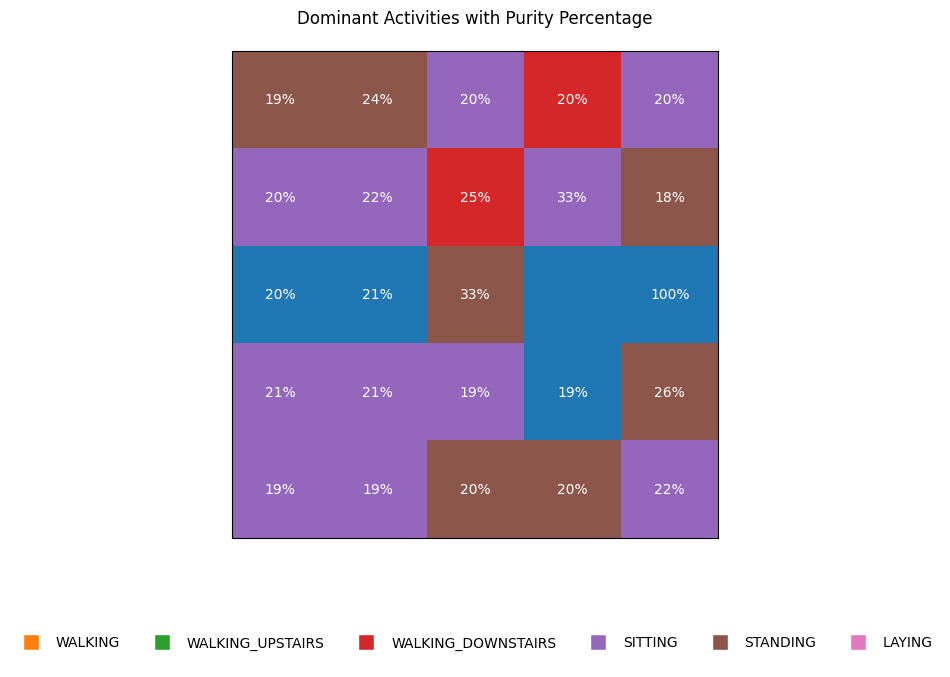

In [46]:
from collections import Counter

har_counts = np.zeros(har_som.grid_shape)
har_dominant = np.zeros(har_som.grid_shape, dtype=int)
har_purity = np.zeros(har_som.grid_shape)

for i in range(har_som.grid_shape[0]):
    for j in range(har_som.grid_shape[1]):
        samples = [(x,l) for (ni,nj),(x,l) in zip(har_bmus, zip(X_train, y_train)) if (ni,nj) == (i,j)]
        
        if samples:
            labels = [l for (x,l) in samples]
            counter = Counter(labels)
            har_counts[i,j] = len(labels)
            har_dominant[i,j], count = counter.most_common(1)[0]
            har_purity[i,j] = count / har_counts[i,j]

print("Corrected neuron activity purity analysis:")

for i in range(har_som.grid_shape[0]):
    for j in range(har_som.grid_shape[1]):
        if har_counts[i,j] > 0:
            print(f"Neuron ({i},{j}): {activity_labels[har_dominant[i,j]]} "
                  f"({har_purity[i,j]:.1%} pure, {int(har_counts[i,j])} samples)")


plt.figure(figsize=(12, 8))

gs = plt.GridSpec(2, 1, height_ratios=[10, 1], hspace=0.3)

ax1 = plt.subplot(gs[0])
im = ax1.imshow(har_dominant, cmap='tab10', vmin=1, vmax=10)
for i in range(har_som.grid_shape[0]):
    for j in range(har_som.grid_shape[1]):
        if har_counts[i,j] > 0:
            ax1.text(j, i, f"{har_purity[i,j]:.0%}", 
                    ha='center', va='center', color='white')
ax1.set_title("Dominant Activities with Purity Percentage", pad=20)
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = plt.subplot(gs[1])
ax2.axis('off')
legend_elements = [plt.Line2D([0], [0], marker='s', color='w', 
                             label=activity_labels[i], 
                             markerfacecolor=plt.cm.tab10(i/10), 
                             markersize=12) for i in range(1, 7)]
ax2.legend(handles=legend_elements, 
          ncol=6, 
          loc='center', 
          frameon=False)

plt.tight_layout()
plt.show()

In [47]:
har_som_hex = SOM(grid_shape=(5,5), 
                              input_dim=X_train.shape[1],
                              topology='hexagonal',
                              neighborhood_fn='gaussian')

print("Training hexagonal SOM on HAR data...")
har_som_hex.train(X_train, num_epochs=50, beta=1.0, lambda_=5)

har_bmus_hex = har_som_hex.map_vects(X_train)
har_counts_hex = np.zeros(har_som_hex.grid_shape)
har_dominant_hex = np.zeros(har_som_hex.grid_shape, dtype=int)
har_purity_hex = np.zeros(har_som_hex.grid_shape)

Training hexagonal SOM on HAR data...
Epoch 1/50 completed.
Epoch 2/50 completed.
Epoch 3/50 completed.
Epoch 4/50 completed.
Epoch 5/50 completed.
Epoch 6/50 completed.
Epoch 7/50 completed.
Epoch 8/50 completed.
Epoch 9/50 completed.
Epoch 10/50 completed.
Epoch 11/50 completed.
Epoch 12/50 completed.
Epoch 13/50 completed.
Epoch 14/50 completed.
Epoch 15/50 completed.
Epoch 16/50 completed.
Epoch 17/50 completed.
Epoch 18/50 completed.
Epoch 19/50 completed.
Epoch 20/50 completed.
Epoch 21/50 completed.
Epoch 22/50 completed.
Epoch 23/50 completed.
Epoch 24/50 completed.
Epoch 25/50 completed.
Epoch 26/50 completed.
Epoch 27/50 completed.
Epoch 28/50 completed.
Epoch 29/50 completed.
Epoch 30/50 completed.
Epoch 31/50 completed.
Epoch 32/50 completed.
Epoch 33/50 completed.
Epoch 34/50 completed.
Epoch 35/50 completed.
Epoch 36/50 completed.
Epoch 37/50 completed.
Epoch 38/50 completed.
Epoch 39/50 completed.
Epoch 40/50 completed.
Epoch 41/50 completed.
Epoch 42/50 completed.
Epoch

Hexagonal SOM purity analysis:
Neuron (0,0): STANDING (17.6% pure, 618 samples)
Neuron (0,1): STANDING (19.6% pure, 470 samples)
Neuron (0,2): STANDING (20.0% pure, 679 samples)
Neuron (0,3): WALKING (20.2% pure, 346 samples)
Neuron (0,4): WALKING_UPSTAIRS (25.0% pure, 4 samples)
Neuron (1,0): LAYING (21.8% pure, 344 samples)
Neuron (1,1): STANDING (19.5% pure, 169 samples)
Neuron (1,2): SITTING (19.1% pure, 320 samples)
Neuron (1,3): WALKING_DOWNSTAIRS (40.0% pure, 10 samples)
Neuron (1,4): STANDING (19.3% pure, 357 samples)
Neuron (2,0): WALKING (18.7% pure, 439 samples)
Neuron (2,1): LAYING (19.8% pure, 263 samples)
Neuron (2,2): SITTING (23.1% pure, 13 samples)
Neuron (2,3): LAYING (25.7% pure, 144 samples)
Neuron (2,4): LAYING (21.5% pure, 349 samples)
Neuron (3,0): STANDING (21.4% pure, 332 samples)
Neuron (3,1): WALKING_UPSTAIRS (21.6% pure, 37 samples)
Neuron (3,2): LAYING (18.5% pure, 286 samples)
Neuron (3,3): LAYING (20.7% pure, 242 samples)
Neuron (3,4): SITTING (20.8% pure

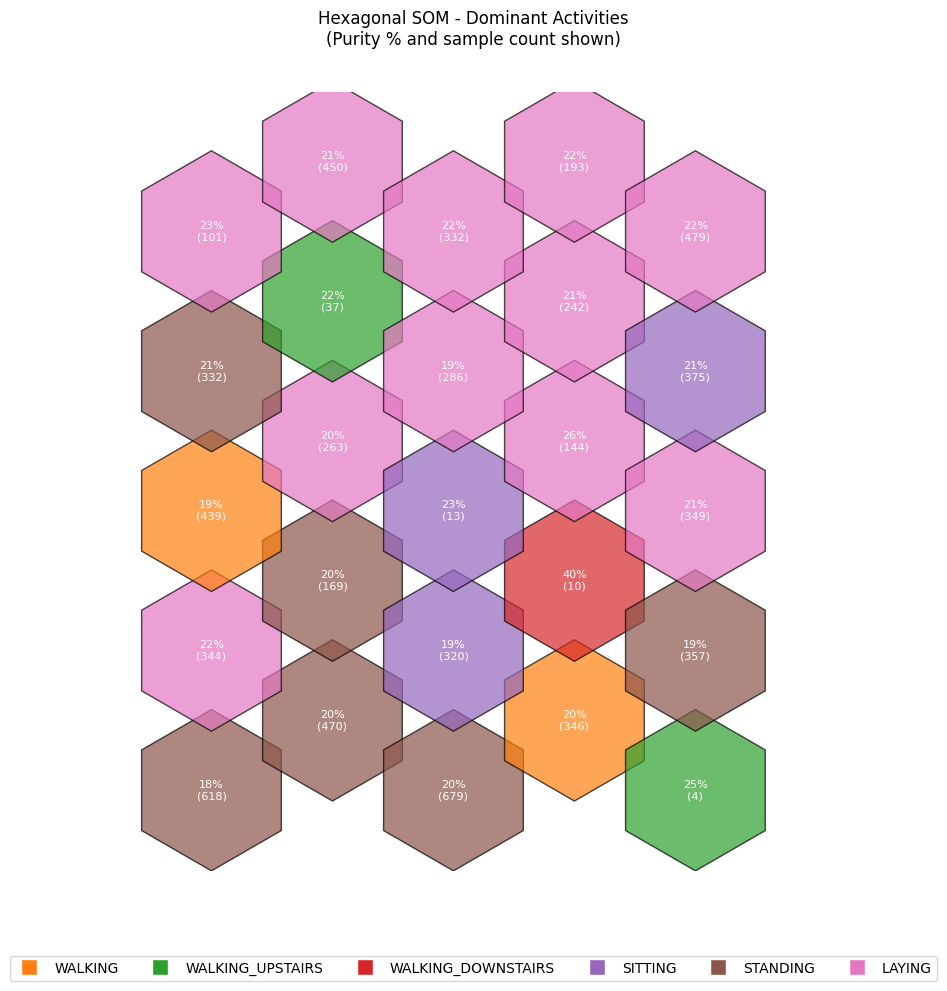

In [48]:
from matplotlib.patches import RegularPolygon

for i in range(har_som_hex.grid_shape[0]):
    for j in range(har_som_hex.grid_shape[1]):
        samples = [(x,l) for (ni,nj),(x,l) in zip(har_bmus_hex, zip(X_train, y_train)) if (ni,nj) == (i,j)]
        if samples:
            labels = [l for (x,l) in samples]
            counter = Counter(labels)
            har_counts_hex[i,j] = len(labels)
            har_dominant_hex[i,j], count = counter.most_common(1)[0]
            har_purity_hex[i,j] = count / har_counts_hex[i,j]

print("Hexagonal SOM purity analysis:")
for i in range(har_som_hex.grid_shape[0]):
    for j in range(har_som_hex.grid_shape[1]):
        if har_counts_hex[i,j] > 0:
            print(f"Neuron ({i},{j}): {activity_labels[har_dominant_hex[i,j]]} "
                  f"({har_purity_hex[i,j]:.1%} pure, {int(har_counts_hex[i,j])} samples)")

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.set_aspect('equal')

for i in range(har_som_hex.grid_shape[0]):
    for j in range(har_som_hex.grid_shape[1]):
        x = j * 1.5
        y = i * np.sqrt(3) + (j % 2) * np.sqrt(3)/2
        
        if har_counts_hex[i,j] > 0:
            color = plt.cm.tab10(har_dominant_hex[i,j]/10)
            hexagon = RegularPolygon((x, y), numVertices=6, radius=1.0,
                                   facecolor=color, alpha=0.7, edgecolor='black')
            ax.add_patch(hexagon)
            plt.text(x, y, f"{har_purity_hex[i,j]:.0%}\n({int(har_counts_hex[i,j])})", 
                     ha='center', va='center', color='white', fontsize=8)
        else:
            hexagon = RegularPolygon((x, y), numVertices=6, radius=1.0,
                                   facecolor='lightgray', edgecolor='black')
            ax.add_patch(hexagon)
            plt.text(x, y, "Empty", ha='center', va='center', color='black', fontsize=8)

legend_elements = [plt.Line2D([0], [0], marker='s', color='w', 
                             label=activity_labels[i], 
                             markerfacecolor=plt.cm.tab10(i/10), 
                             markersize=12) for i in range(1, 7)]
plt.legend(handles=legend_elements, ncol=6, bbox_to_anchor=(0.5, -0.1), loc='upper center')

plt.title("Hexagonal SOM - Dominant Activities\n(Purity % and sample count shown)", y=1.05)
plt.xlim(-1, har_som_hex.grid_shape[1]*1.5)
plt.ylim(-1, har_som_hex.grid_shape[0]*np.sqrt(3))
plt.axis('off')
plt.tight_layout()
plt.show()